Tratamento de Dados

In [ ]:
## Unigram Tagger
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = "/content/drive/MyDrive/O LIVRO/Penn Treebank/Penn Treebank/Secs0-18 - training"
content = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        content.extend(pt)

content

Mounted at /content/drive


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.'),
 ('Mr.', 'NNP'),
 ('Vinken', 'NNP'),
 ('is', 'VBZ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Elsevier', 'NNP'),
 ('N.V.', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'NNP'),
 ('publishing', 'VBG'),
 ('group', 'NN'),
 ('.', '.'),
 ('Rudolph', 'NNP'),
 ('Agnew', 'NNP'),
 (',', ','),
 ('55', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 ('and', 'CC'),
 ('former', 'JJ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Consolidated', 'NNP'),
 ('Gold', 'NNP'),
 ('Fields', 'NNP'),
 ('PLC', 'NNP'),
 (',', ','),
 ('was', 'VBD'),
 ('named', 'VBN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('British', 'JJ'),
 ('industrial', 'JJ'),
 ('conglomerate', 'NN'),

In [ ]:
taggers = [tagger[1] for tagger in content]

words = [word[0] for word in content]

In [ ]:

# Criando um DataFrame com os dados
df = pd.DataFrame(content, columns=["word", "tag"])

# Contando as frequências de cada par (tag, word)
frequencias = df.groupby(["word", "tag"]).size().reset_index(name="freq")


In [ ]:
# Exibindo as frequências
df = frequencias
df

,word,tag,freq
0,!,.,66
1,#,#,127
2,$,$,6777
3,%,JJ,10
4,%,NN,4708
...,...,...,...
50299,zoning,NN,1
50300,zoning,VBG,2
50301,zoo,NN,1
50302,zoology,NN,1


Modelo de unigrama

In [ ]:
# Para cada palavra, pegamos a tag mais frequente associada
# Vamos criar um dicionário onde a chave é a palavra e o valor é a tag mais frequente
unigram_model = {}

for word in df["word"].unique():
    # Filtramos as linhas que correspondem a esta palavra
    word_data = df[df["word"] == word]

    # Encontramos a tag com maior frequência para essa palavra
    most_frequent_tag = word_data.loc[word_data["freq"].idxmax()]["tag"]

    # Adicionamos ao modelo unigram
    unigram_model[word] = most_frequent_tag

# Exibindo o modelo unigram
print("Modelo Unigram:")
print(unigram_model)

Modelo Unigram:
{'!': '.', '#': '#', '$': '$', '%': 'NN', '&': 'CC', "'": 'POS', "''": "''", "'30s": 'CD', "'40s": 'CD', "'50s": 'CD', "'60s": 'NNS', "'70s": 'CD', "'71": 'CD', "'80s": 'NNS', "'82": 'CD', "'86": 'CD', "'90s": 'CD', "'Em": 'NNP', "'N": 'CC', "'S": 'POS', "'T-": 'PRP', "'d": 'MD', "'em": 'PRP', "'ll": 'MD', "'m": 'VBP', "'n'": 'CC', "'re": 'VBP', "'s": 'POS', "'til": 'IN', "'ve": 'VBP', ',': ',', '-': ':', '--': ':', '-0.06': 'CD', '-LCB-': '-LRB-', '-LRB-': '-LRB-', '-RCB-': '-RRB-', '-RRB-': '-RRB-', '.': '.', '...': ':', '.270': 'CD', '.50': 'CD', '.what': 'WDT', '0': 'CD', '0.0002': 'CD', '0.0015': 'CD', '0.0040': 'CD', '0.0075': 'CD', '0.0085': 'CD', '0.01': 'CD', '0.0100': 'CD', '0.0108': 'CD', '0.0115': 'CD', '0.02': 'CD', '0.025': 'CD', '0.03': 'CD', '0.05': 'CD', '0.06': 'CD', '0.07': 'CD', '0.1': 'CD', '0.10': 'CD', '0.11': 'CD', '0.12': 'CD', '0.13': 'CD', '0.15': 'CD', '0.16': 'CD', '0.17': 'CD', '0.19': 'CD', '0.2': 'CD', '0.20': 'CD', '0.23': 'CD', '0.24': 

In [ ]:
test_set = "/content/drive/MyDrive/O LIVRO/Penn Treebank/Penn Treebank/Secs19-21 - development"

In [ ]:
content = []
with open(test_set,'r') as r:
  # print(r.read())
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        content.extend(pt)

content

words = [word[0] for word in content]

In [ ]:
def unigram_tagger(word, model):
    return model.get(word, predict_tag_by_suffix(word,suffix_stats_2_3_4_5)) #Usa o NN caso encontre uma palavra desconhecida no test_set

resultados_teste = [(word, unigram_tagger(word, unigram_model)) for word in words]


In [ ]:
df_test = pd.DataFrame(columns=["word", "tag"])

In [ ]:
df_test["word"] = [word[0] for word in content]
df_test["tag"] = [word[1] for word in content]

In [ ]:
df_test

,word,tag
0,The,DT
1,Arizona,NNP
2,Corporations,NNP
3,Commission,NNP
4,authorized,VBD
...,...,...
131763,join,VB
131764,the,DT
131765,winning,VBG
131766,bidder,NN


In [ ]:
df_predict = pd.DataFrame(columns=["word", "tag"])

df_predict["word"] = [word[0] for word in resultados_teste]
df_predict["tag"] = [word[1] for word in resultados_teste]

In [ ]:
df_predict

,word,tag
0,The,DT
1,Arizona,NNP
2,Corporations,NNS
3,Commission,NNP
4,authorized,VBD
...,...,...
131763,join,VB
131764,the,DT
131765,winning,VBG
131766,bidder,NN


In [ ]:
df_test.to_csv("test.csv", index=False)
df_predict.to_csv("predict.csv", index=False)

In [ ]:
df_test.describe()

,word,tag,predicted_tag
count,131768,131768,131768
unique,15081,45,18
top,",",NN,NN
freq,7086,18538,54325


Acurácia e Confusion Matrix do modelo de Unigrama

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Alinhando os dois DataFrames, para garantir que as palavras estão na mesma ordem
df_test = df_test.sort_values(by="word").reset_index(drop=True)
df_predict = df_predict.sort_values(by="word").reset_index(drop=True)

# Agora que as palavras estão na mesma ordem, podemos adicionar a coluna de tags preditas
df_test["predicted_tag"] = df_predict["tag"]

# Comparar as tags reais com as preditas
acuracia = accuracy_score(df_test["tag"], df_test["predicted_tag"])
print(f"\nAcurácia: {acuracia:.4f}")


Acurácia: 0.9257


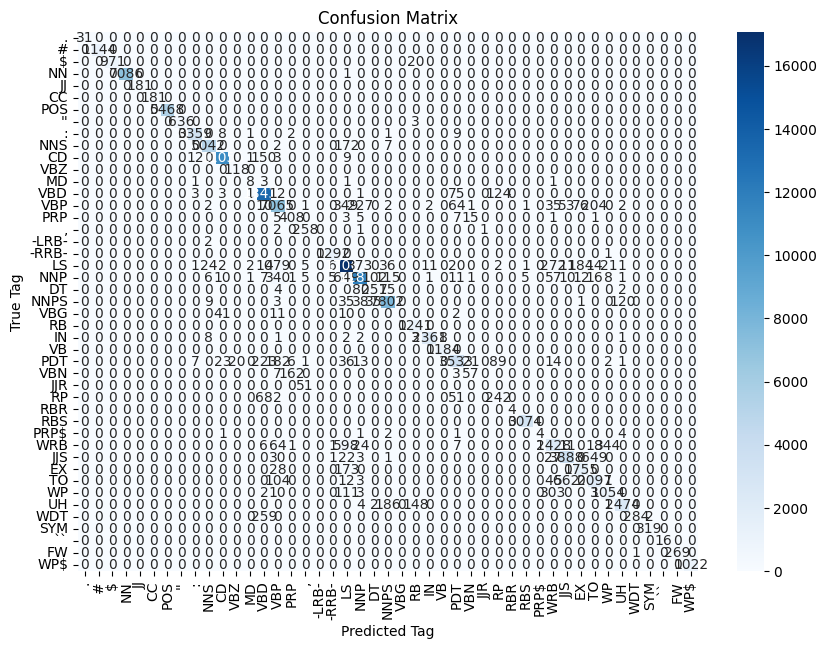

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando a Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(df_test["tag"], df_test["predicted_tag"])

# Plotando a Confusion Matrix com Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_test["tag"].unique(), yticklabels=df_test["tag"].unique())
plt.xlabel("Predicted Tag")
plt.ylabel("True Tag")
plt.title("Confusion Matrix")
plt.show()

Contando quantas vezes as palavras aparecem para melhorar a acurácia

In [ ]:
# Filtrar palavras com frequência baixa
rare_words = {word: count for word, count in freq.items() if count <= 5}

Agrupando as palavras com frequencias

In [ ]:
words

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.',
 'Mr.',
 'Vinken',
 'is',
 'chairman',
 'of',
 'Elsevier',
 'N.V.',
 ',',
 'the',
 'Dutch',
 'publishing',
 'group',
 '.',
 'Rudolph',
 'Agnew',
 ',',
 '55',
 'years',
 'old',
 'and',
 'former',
 'chairman',
 'of',
 'Consolidated',
 'Gold',
 'Fields',
 'PLC',
 ',',
 'was',
 'named',
 'a',
 'nonexecutive',
 'director',
 'of',
 'this',
 'British',
 'industrial',
 'conglomerate',
 '.',
 'A',
 'form',
 'of',
 'asbestos',
 'once',
 'used',
 'to',
 'make',
 'Kent',
 'cigarette',
 'filters',
 'has',
 'caused',
 'a',
 'high',
 'percentage',
 'of',
 'cancer',
 'deaths',
 'among',
 'a',
 'group',
 'of',
 'workers',
 'exposed',
 'to',
 'it',
 'more',
 'than',
 '30',
 'years',
 'ago',
 ',',
 'researchers',
 'reported',
 '.',
 'The',
 'asbestos',
 'fiber',
 ',',
 'crocidolite',
 ',',
 'is',
 'unusually',
 'resilient',
 'once',
 'it',
 'enter

In [ ]:
import pandas as pd

list_input = list(zip(words, taggers))
words_table = pd.DataFrame(list_input, columns=["word", "tag"])
#words_table = pd.DataFrame([words,taggers], columns=["word","tag"])
words_table_freq = words_table.groupby("word").size().reset_index(name="freq")

In [ ]:
freq5_words = words_table_freq[words_table_freq['freq'] == 5]['word']
words_with_tags_freq5 = words_table[words_table['word'].isin(freq5_words)]
words_with_tags_freq5_list = words_with_tags_freq5['word'].unique().tolist()

In [ ]:
from collections import defaultdict
#extraindo padrões de sufixo para palavras raras
suffix_stats_5 = defaultdict(lambda: defaultdict(int))  # suffix_stats[suffix][tag] += 1

for word in words_with_tags_freq5_list:
  for k in [2, 3, 4,5]:  # sufixos de 2 a 4 letras
        if len(word) >= k:
          suffix = word[-k:].lower()
          for tagg_word in words_with_tags_freq5[words_with_tags_freq5['word']== word]['tag']:
            suffix_stats_5[suffix][tagg_word] += 1

In [ ]:
suffix_stats_2_3_4_5 = suffix_stats_5 # sufixo das palavras 'raras' que tem freq=5, e as suas respectivas classificações de TAGS

Classificador para palavras desconhecidas a partir de palavras raras

In [ ]:
suffix_stats_2_3_4_5 # sufixo das palavras 'raras' que tem freq=5, e as suas respectivas classificações de TAGS


defaultdict(<function __main__.<lambda>()>,
            {'te': defaultdict(int,
                         {'NN': 29, 'JJ': 17, 'VB': 37, 'NNP': 10, 'VBP': 2}),
             'ite': defaultdict(int, {'NN': 10, 'VB': 5}),
             'lite': defaultdict(int, {'NN': 5}),
             'olite': defaultdict(int, {'NN': 5}),
             'rd': defaultdict(int, {'NNP': 24, 'NN': 1}),
             'ard': defaultdict(int, {'NNP': 9, 'NN': 1}),
             'lard': defaultdict(int, {'NNP': 4, 'NN': 1}),
             'llard': defaultdict(int, {'NNP': 4, 'NN': 1}),
             'ed': defaultdict(int,
                         {'JJ': 142,
                          'VBD': 163,
                          'VBN': 295,
                          'NNP': 8,
                          'NN': 1,
                          'JJR': 1}),
             'ted': defaultdict(int,
                         {'JJ': 39, 'VBN': 107, 'VBD': 36, 'NNP': 3}),
             'ated': defaultdict(int,
                         {'JJ': 30, 'V

In [ ]:
# Exibir os sufixos mais informativos
for suffix, tag_dict in sorted(suffix_stats_2_3_4_5.items(), key=lambda x: sum(x[1].values()), reverse=True)[:10]:
    print(f"Sufixo: {suffix}")
    for tag, count in sorted(tag_dict.items(), key=lambda x: -x[1]):
        print(f"  {tag}: {count}")

Sufixo: ed
  VBN: 295
  VBD: 163
  JJ: 142
  NNP: 8
  NN: 1
  JJR: 1
Sufixo: ng
  VBG: 385
  NN: 96
  JJ: 76
  NNP: 24
  VB: 4
  VBD: 2
  VBN: 2
  VBP: 1
Sufixo: ing
  VBG: 385
  NN: 89
  JJ: 72
  NNP: 19
  VB: 4
  VBP: 1
Sufixo: es
  NNS: 213
  VBZ: 87
  NNP: 36
  NNPS: 14
Sufixo: on
  NN: 162
  NNP: 130
  VBG: 4
  VB: 2
  RB: 1
  JJ: 1
Sufixo: er
  NNP: 126
  NN: 81
  JJ: 22
  VB: 16
  JJR: 10
  RB: 10
  WDT: 5
Sufixo: ted
  VBN: 107
  JJ: 39
  VBD: 36
  NNP: 3
Sufixo: ion
  NN: 150
  NNP: 30
Sufixo: ly
  RB: 149
  JJ: 15
  NN: 6
  NNP: 5
Sufixo: al
  JJ: 112
  NN: 23
  NNP: 21
  VB: 4


In [ ]:
#prever palavra desconhecida com base no sufixo
def predict_tag_by_suffix(word, suffix_stats_2_3_4_5):
  word = word.lower()
  for k in [5,4,3, 2]:  # tenta sufixos maiores primeiro
      if len(word) >= k:
          suffix = word[-k:]
          if suffix in suffix_stats_2_3_4_5:
              # retorna a tag mais comum para o sufixo
              return max(suffix_stats_2_3_4_5[suffix], key=suffix_stats_2_3_4_5[suffix].get)
  return "NN"  # fallback padrão